# Minor Project - Stock Market Analysis Using LSTM

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks ("AXISBANK.NS", "HDFCBANK.NS", "ICICIBANK.NS", "KOTAKBANK.NS"). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of ICICIBANK.NS inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [ ]:
# !pip install yfinance

In [23]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list_full = ["AXISBANK.NS", "HDFCBANK.NS", "ICICIBANK.NS", "KOTAKBANK.NS"]

# Set up End and Start times for data grab
tech_list = ["AXISBANK", "HDFCBANK", "ICICIBANK", "KOTAKBANK"]

today = datetime.now()
end = datetime(2023, 9, 1)
start = datetime(end.year - 1, end.month, end.day)

count = 0
for stock in tech_list:
    globals()[stock] = yf.download(tech_list_full[count], start, end)
    count += 1

company_list = [AXISBANK, HDFCBANK, ICICIBANK, KOTAKBANK]
company_name = ["AXISBANK.NS", "HDFCBANK.NS", "ICICIBANK.NS", "KOTAKBANK.NS"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
# df.to_string()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


'                   Open         High          Low        Close    Adj Close    Volume  company_name\nDate                                                                                               \n2022-09-01   733.500000   754.900024   733.500000   744.150024   743.391418   9353805   AXISBANK.NS\n2022-09-02   749.000000   754.549988   740.250000   750.200012   749.435242   7767812   AXISBANK.NS\n2022-09-05   750.200012   758.799988   749.349976   756.099976   755.329224   5894055   AXISBANK.NS\n2022-09-06   758.000000   761.549988   748.799988   750.000000   749.235413   7606181   AXISBANK.NS\n2022-09-07   743.150024   758.000000   739.049988   755.400024   754.629944  10156460   AXISBANK.NS\n2022-09-08   761.750000   782.200012   757.099976   779.750000   778.955078  13410790   AXISBANK.NS\n2022-09-09   787.950012   787.950012   780.000000   784.849976   784.049866   8732302   AXISBANK.NS\n2022-09-12   789.000000   805.000000   786.799988   801.000000   800.183472  15521649   AX

Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [24]:
# Summary Stats
AXISBANK.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,891.588152,899.680726,882.587548,891.323694,890.568310,1.059006e+07
std,65.124034,64.562230,65.056273,64.592140,64.690726,5.741848e+06
min,720.000000,730.799988,707.700012,716.450012,715.719666,3.085307e+06
25%,854.799988,861.150024,845.500000,853.299988,852.430115,7.172522e+06
50%,895.000000,905.099976,885.450012,895.950012,895.036682,9.103656e+06
75%,945.650024,952.750000,936.599976,945.250000,945.235413,1.237609e+07
max,990.200012,998.000000,980.099976,990.200012,990.200012,5.805772e+07


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [25]:
# General info
AXISBANK.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2022-09-01 to 2023-08-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          249 non-null    float64
 1   High          249 non-null    float64
 2   Low           249 non-null    float64
 3   Close         249 non-null    float64
 4   Adj Close     249 non-null    float64
 5   Volume        249 non-null    int64  
 6   company_name  249 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

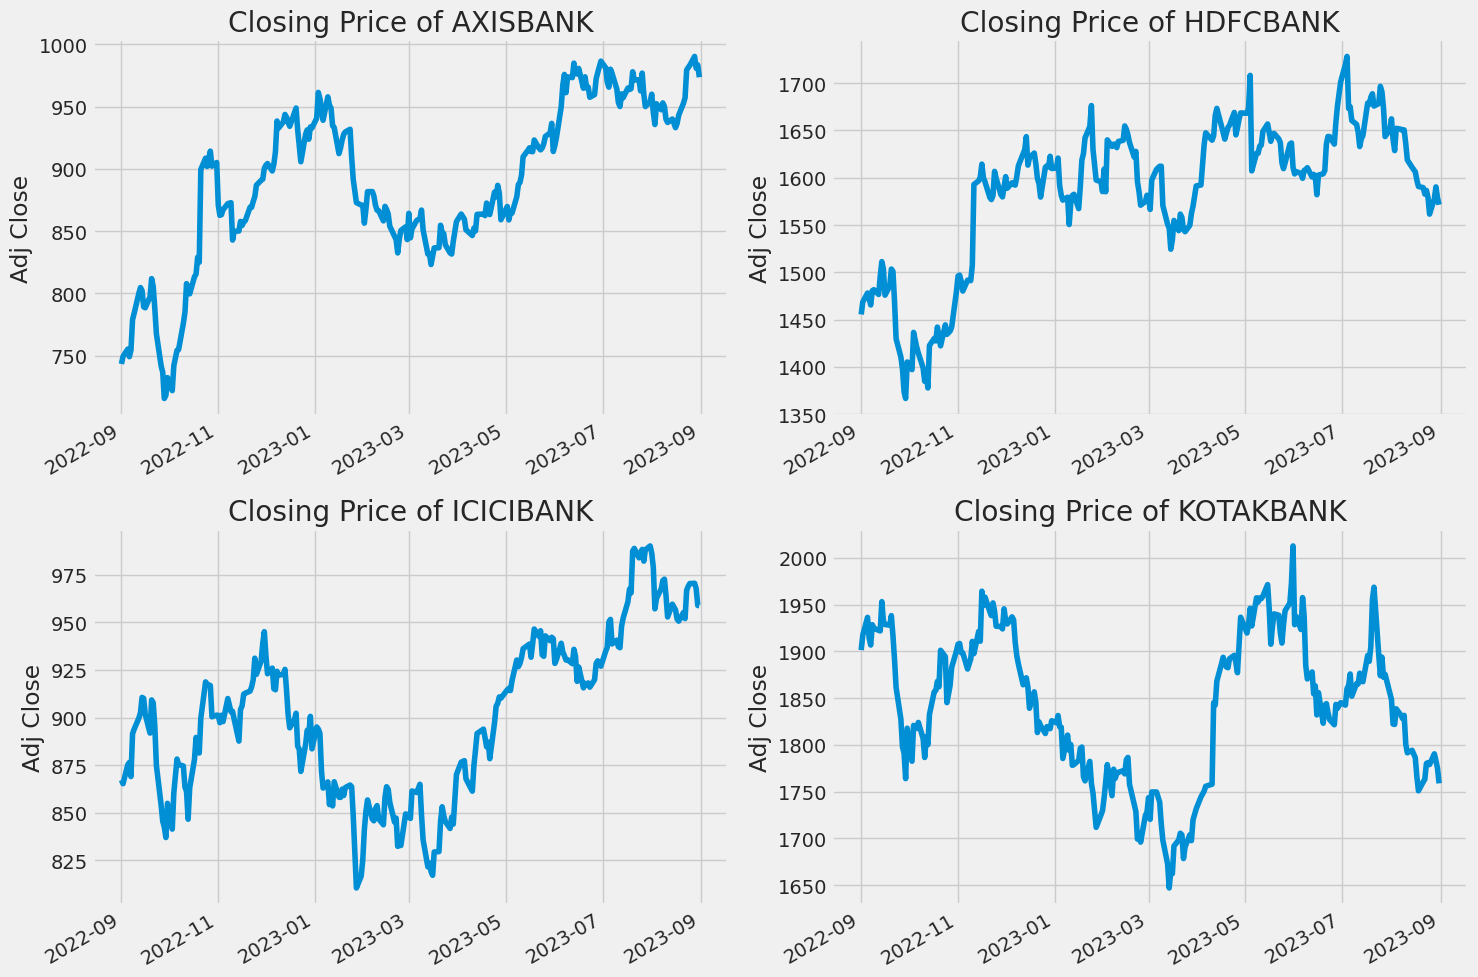

In [26]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

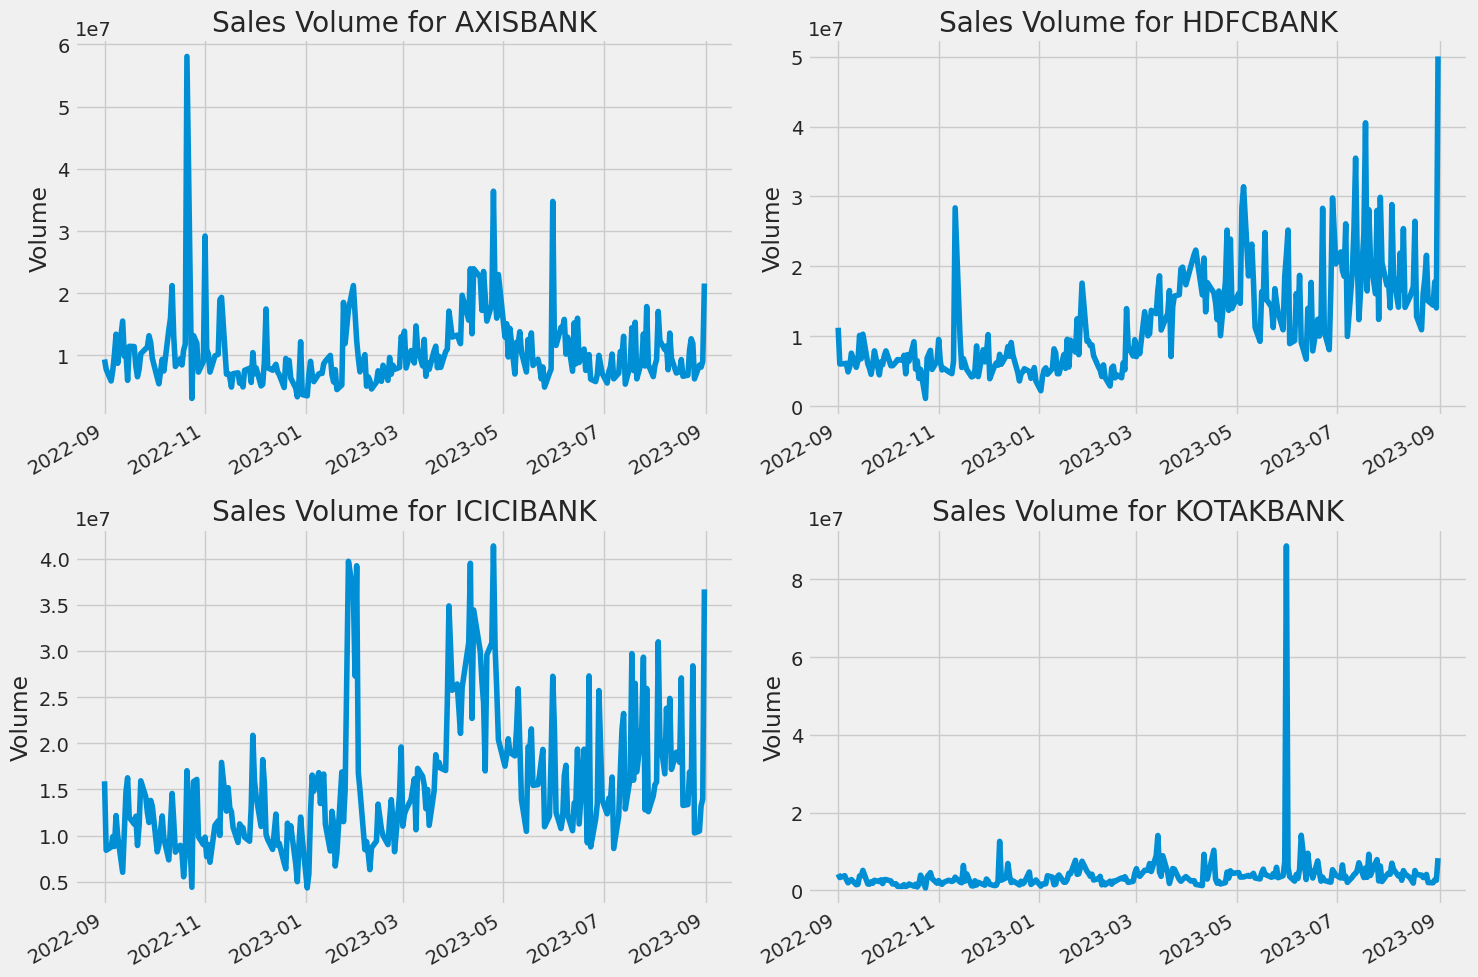

In [28]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

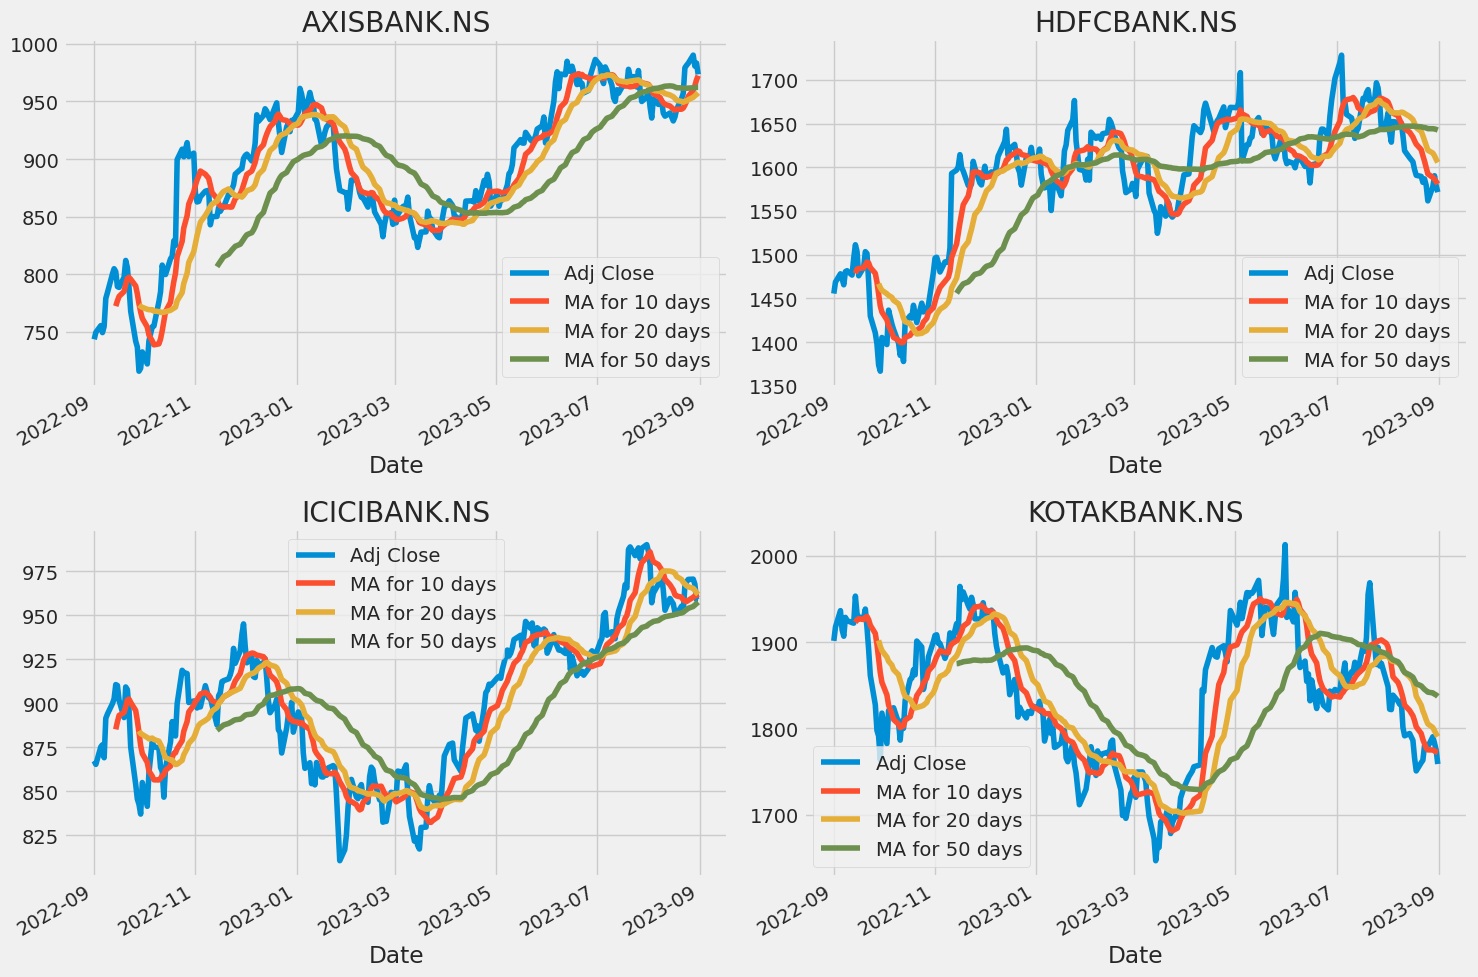

In [29]:
ma_day = [10, 20, 50]

new_company_list = company_list

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AXISBANK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AXISBANK.NS')

HDFCBANK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('HDFCBANK.NS')

ICICIBANK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('ICICIBANK.NS')

KOTAKBANK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('KOTAKBANK.NS')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the HDFCBANK.NS stock.

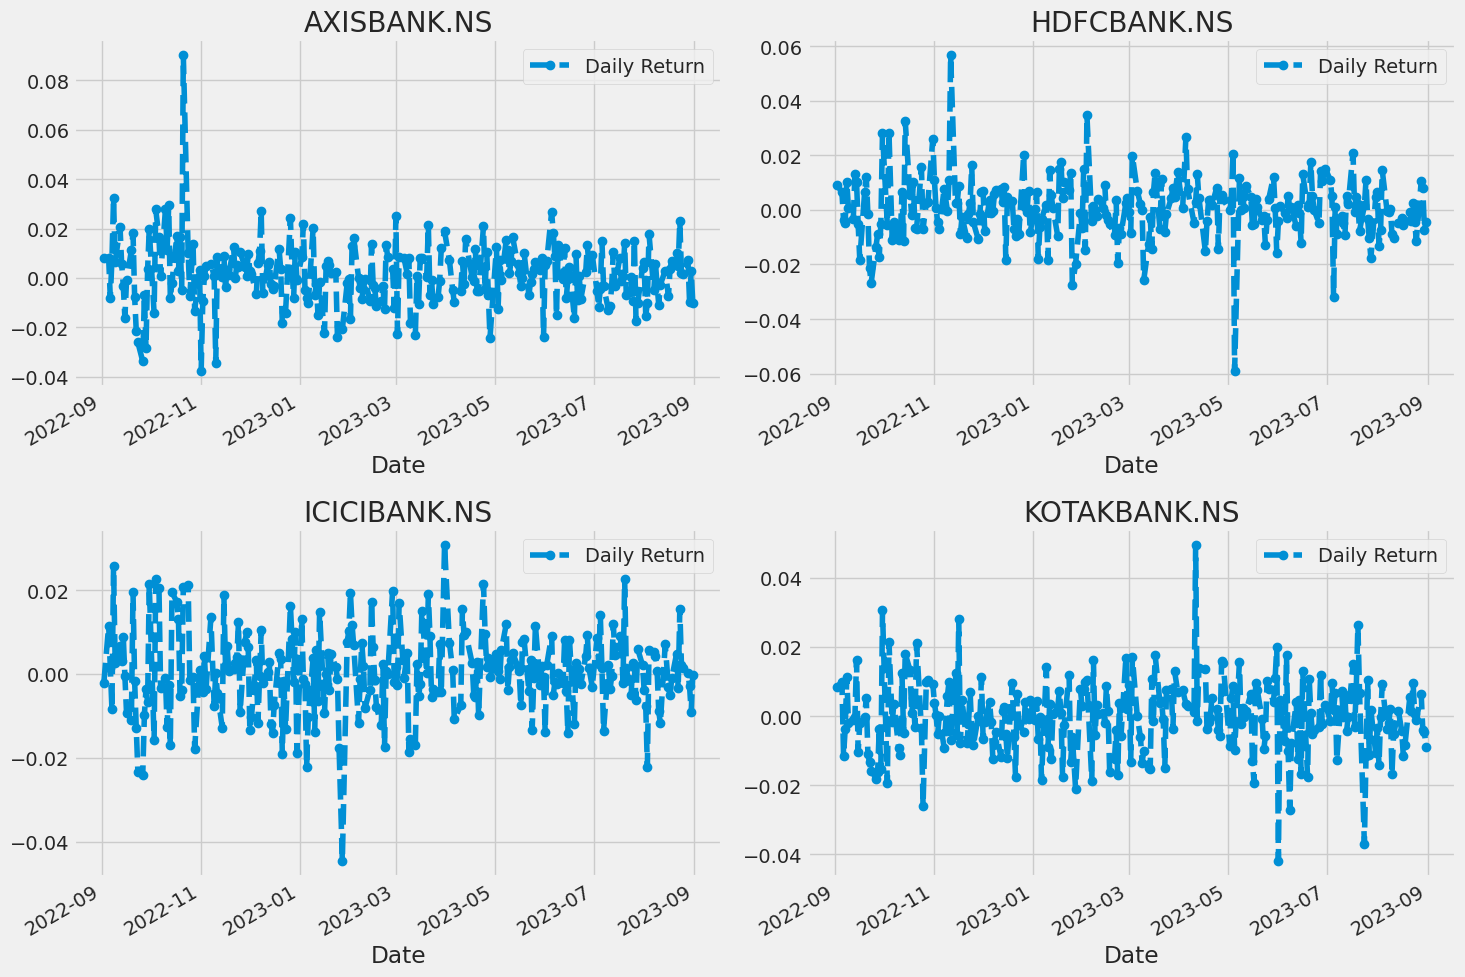

In [30]:
# print(new_company_list)

# We'll use pct_change to find the percent change for each day
for company in new_company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AXISBANK['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AXISBANK.NS')

HDFCBANK['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('HDFCBANK.NS')

ICICIBANK['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('ICICIBANK.NS')

KOTAKBANK['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('KOTAKBANK.NS')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

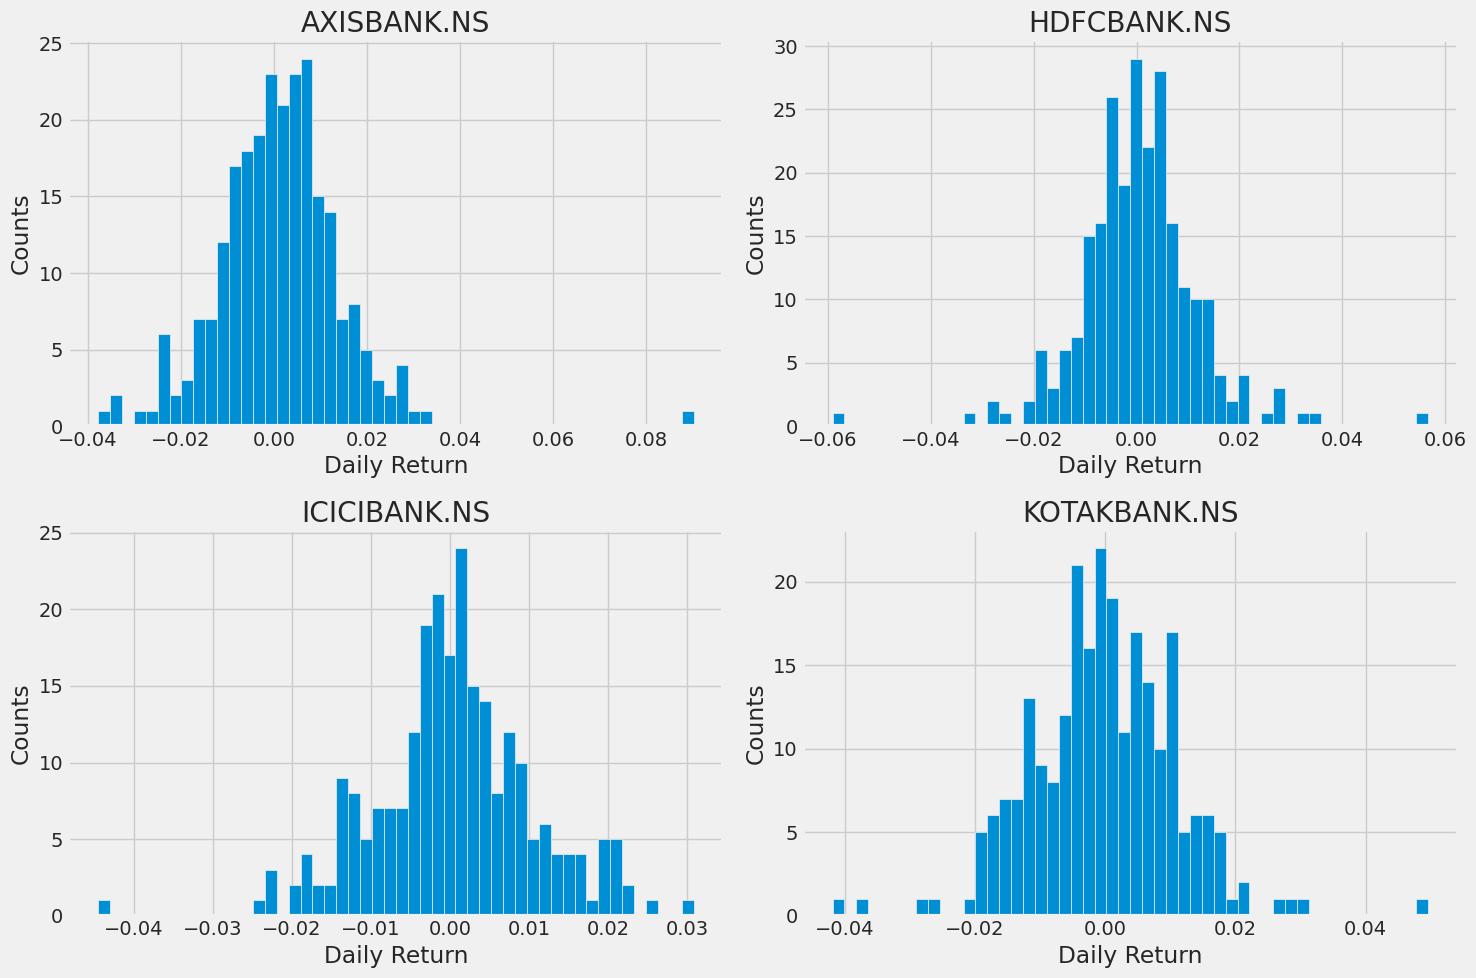

In [31]:
plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [33]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list_full, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,KOTAKBANK.NS
Date,,,,
2022-09-01,NaN,NaN,NaN,NaN
2022-09-02,0.008130,0.009068,-0.002230,0.008408
2022-09-05,0.007865,0.006429,0.011520,0.009928
2022-09-06,-0.008068,-0.003813,0.001360,-0.011456
2022-09-07,0.007200,-0.004734,-0.008431,-0.003889


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

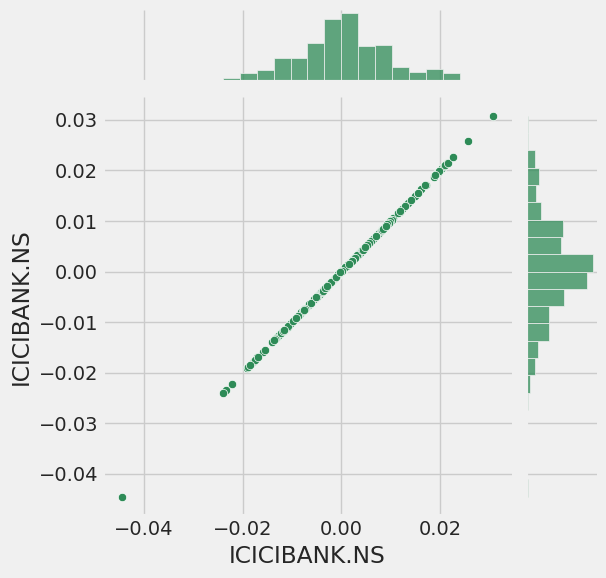

In [34]:
# Comparing ICICIBANK.NS to itself should show a perfectly linear relationship
sns.jointplot(x='ICICIBANK.NS', y='ICICIBANK.NS', data=tech_rets, kind='scatter', color='seagreen')

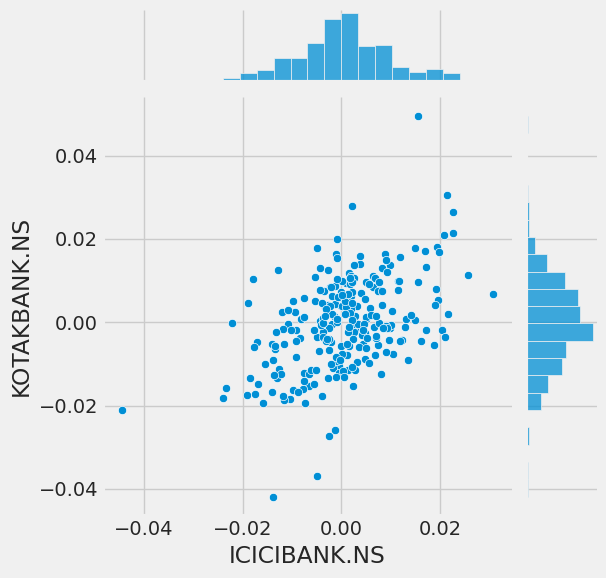

In [35]:
# We'll use joinplot to compare the daily returns of ICICIBANK.NS and KOTAKBANK.NS
sns.jointplot(x='ICICIBANK.NS', y='KOTAKBANK.NS', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

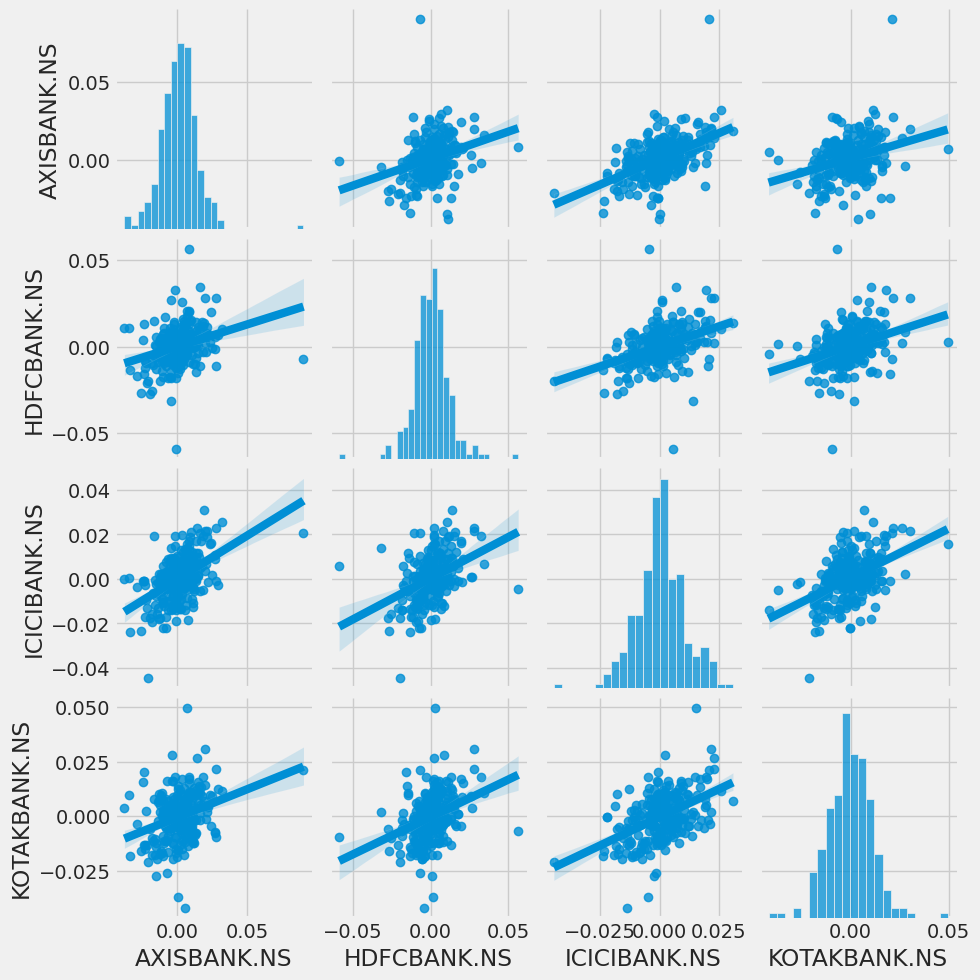

In [36]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between ICICIBANK.NS and AXISBANK.NS daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

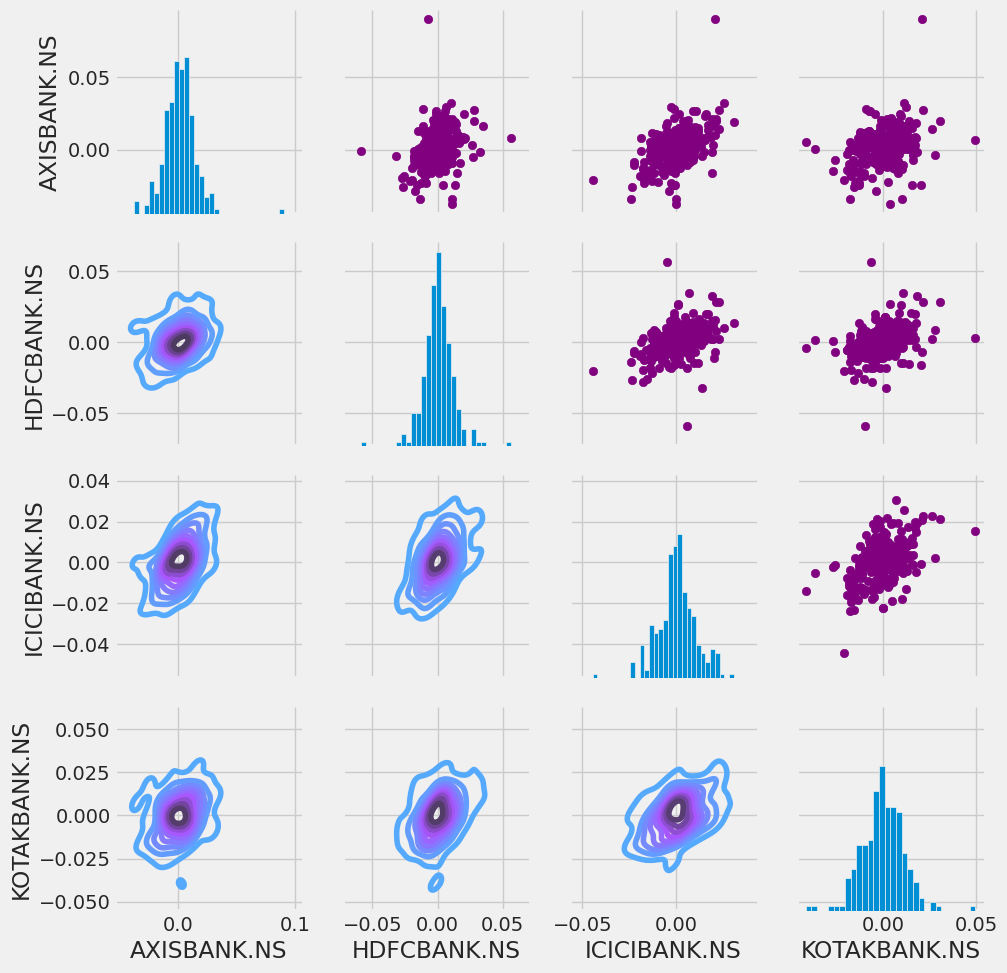

In [37]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

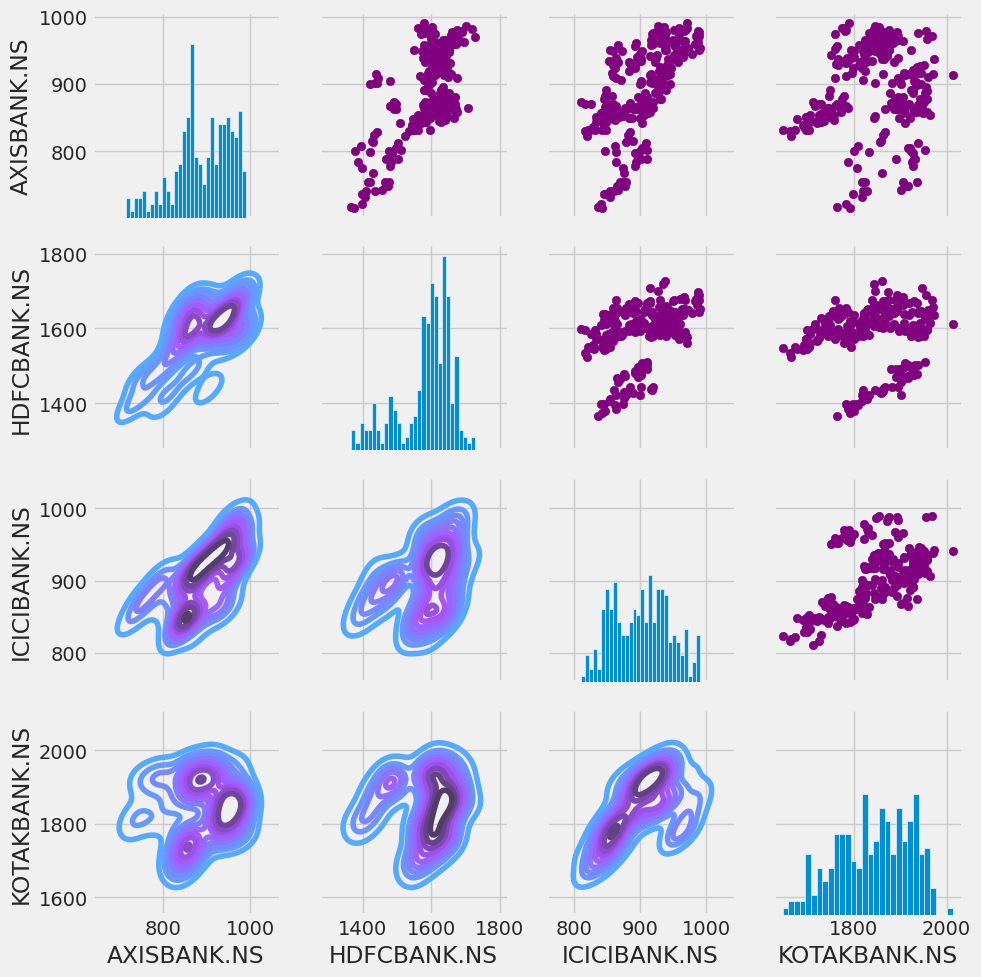

In [38]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between INDUSINDBK.NS and HDFCBANK.NS.

Text(0.5, 1.0, 'Correlation of stock closing price')

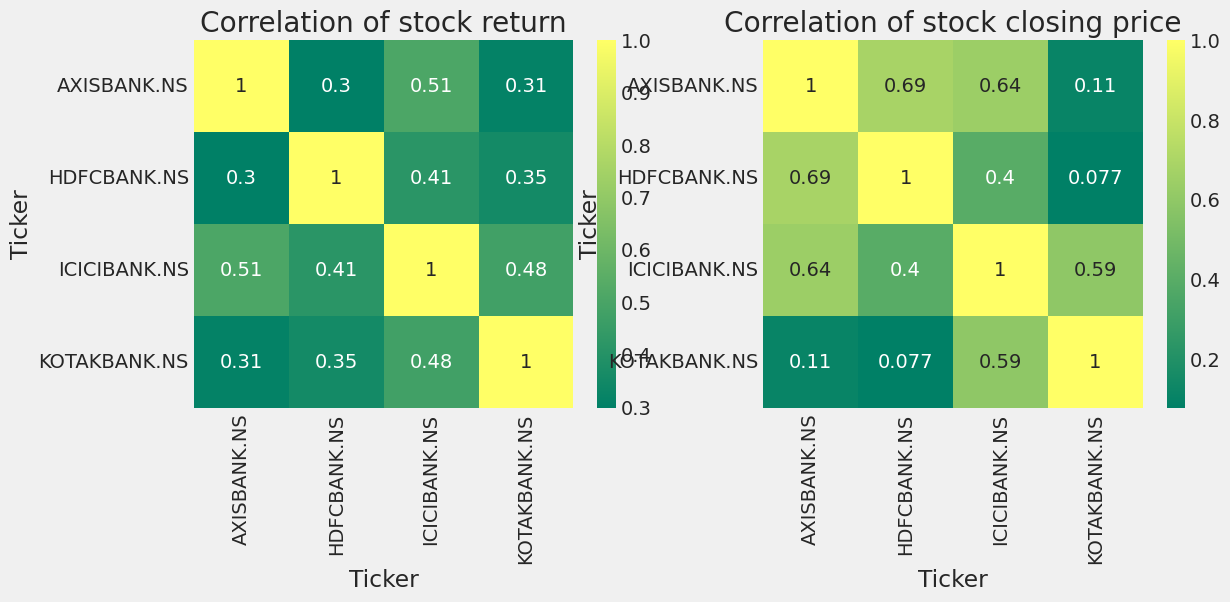

In [39]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that INDUSINDBK.NS and AXISBANK.NS had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

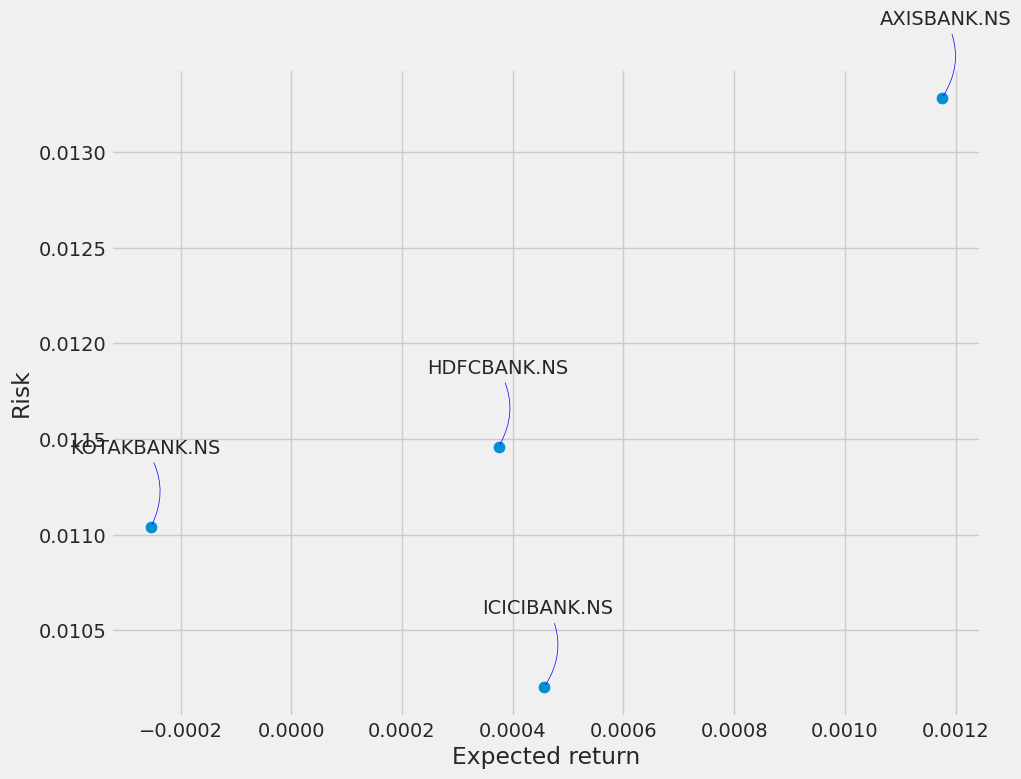

In [40]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of HDFCBANK.NS inc:

In [103]:
# Get the stock quote
df = pdr.get_data_yahoo('ICICIBANK.NS', start='2004-01-01', end=datetime.now())

# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,54.163635,55.545452,54.000000,55.045452,41.755436,8115838
2004-01-02,55.454544,56.263638,55.009090,55.736362,42.279549,9644101
2004-01-05,55.927273,57.863636,55.545452,56.945454,43.196720,11267069
2004-01-06,57.090908,57.681816,56.200001,56.799999,43.086376,9597362
2004-01-07,56.854546,56.909088,54.572727,55.281818,41.934742,6361212
...,...,...,...,...,...,...
2024-03-01,1055.000000,1089.949951,1054.000000,1086.900024,1086.900024,14909562
2024-03-04,1081.000000,1095.000000,1080.099976,1092.349976,1092.349976,11424581
2024-03-05,1086.199951,1099.500000,1076.500000,1088.050049,1088.050049,9222544


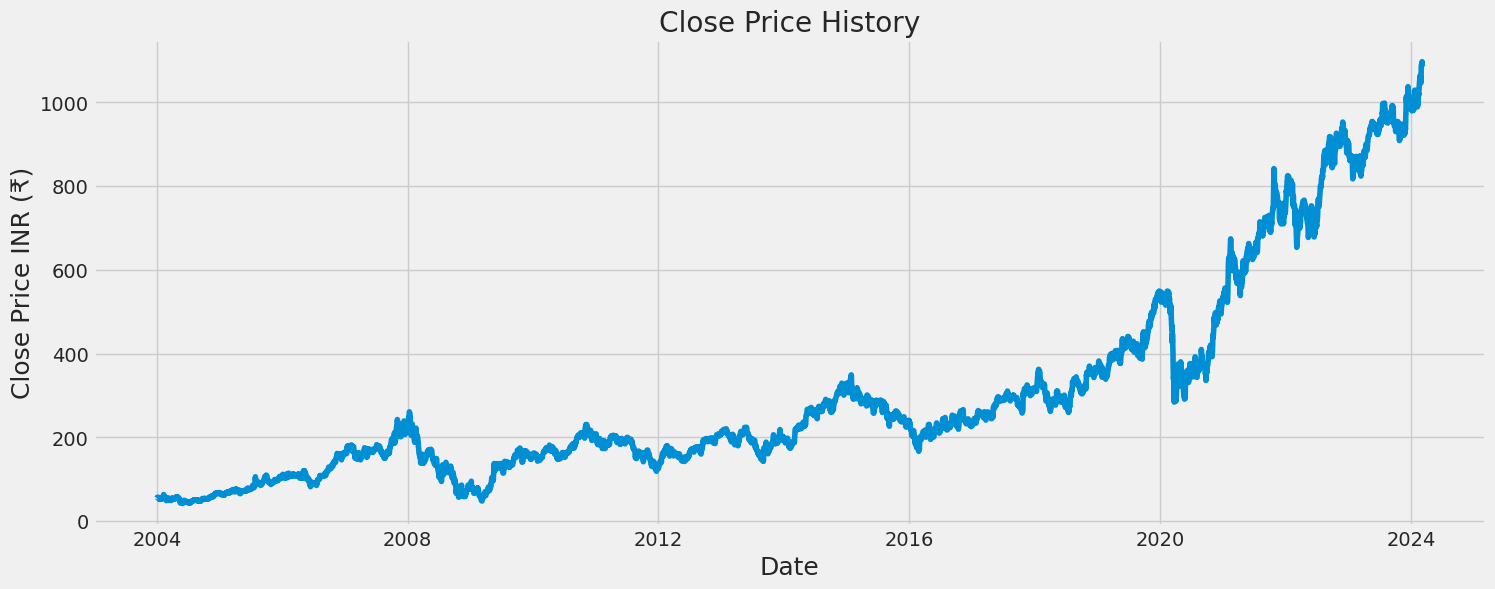

In [104]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.show()

In [105]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4746

In [106]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01246629],
       [0.01312105],
       [0.01426688],
       ...,
       [0.99142357],
       [1.        ],
       [0.99132871]])

In [107]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(120, len(train_data)):
    x_train.append(train_data[i-120:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 121:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01246629, 0.01312105, 0.01426688, 0.01412904, 0.01269029,
       0.01240599, 0.01269891, 0.0128626 , 0.01361212, 0.01337951,
       0.01194938, 0.00911495, 0.01200969, 0.01130323, 0.01109647,
       0.01025217, 0.01090693, 0.01090693, 0.01294013, 0.01089831,
       0.00986448, 0.01113954, 0.01113954, 0.01118262, 0.01240599,
       0.01312105, 0.01566256, 0.01750623, 0.02030619, 0.01511118,
       0.01524041, 0.01395673, 0.01363797, 0.01471488, 0.01498195,
       0.01384474, 0.01142385, 0.00889096, 0.00765036, 0.00759005,
       0.00643561, 0.00698699, 0.00883927, 0.00883927, 0.00807251,
       0.01007986, 0.01064847, 0.01273337, 0.01237153, 0.01014017,
       0.00856358, 0.00889096, 0.00824481, 0.00905465, 0.00988171,
       0.00888234, 0.00814143, 0.00794328, 0.00736605, 0.00794328,
       0.00674576, 0.00941649, 0.01196661, 0.01156169, 0.01135492,
       0.01215614, 0.0117943 , 0.01127739, 0.01051063, 0.01017463,
       0.01068293, 0.01068293, 0.0105537 , 0.0105537 , 0.0105

In [109]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

Epoch 1/10
145/145 [==============================] - 53s 343ms/step - loss: 0.0021
Epoch 2/10
145/145 [==============================] - 30s 206ms/step - loss: 1.9280e-04
Epoch 3/10
145/145 [==============================] - 30s 210ms/step - loss: 1.7567e-04
Epoch 4/10
145/145 [==============================] - 31s 215ms/step - loss: 1.7178e-04
Epoch 5/10
145/145 [==============================] - 32s 219ms/step - loss: 1.4960e-04
Epoch 6/10
145/145 [==============================] - 30s 204ms/step - loss: 1.6329e-04
Epoch 7/10
145/145 [==============================] - 30s 208ms/step - loss: 1.3060e-04
Epoch 8/10
145/145 [==============================] - 31s 212ms/step - loss: 1.2158e-04
Epoch 9/10
145/145 [==============================] - 29s 202ms/step - loss: 1.0794e-04
Epoch 10/10
145/145 [==============================] - 32s 220ms/step - loss: 1.0454e-04


In [110]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 120: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(120, len(test_data)):
    x_test.append(test_data[i-120:i, 0])

# print(x_test)

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 [==============================] - 1s 67ms/step


13.620811899128777

<ipython-input-111-3f041f07b212>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


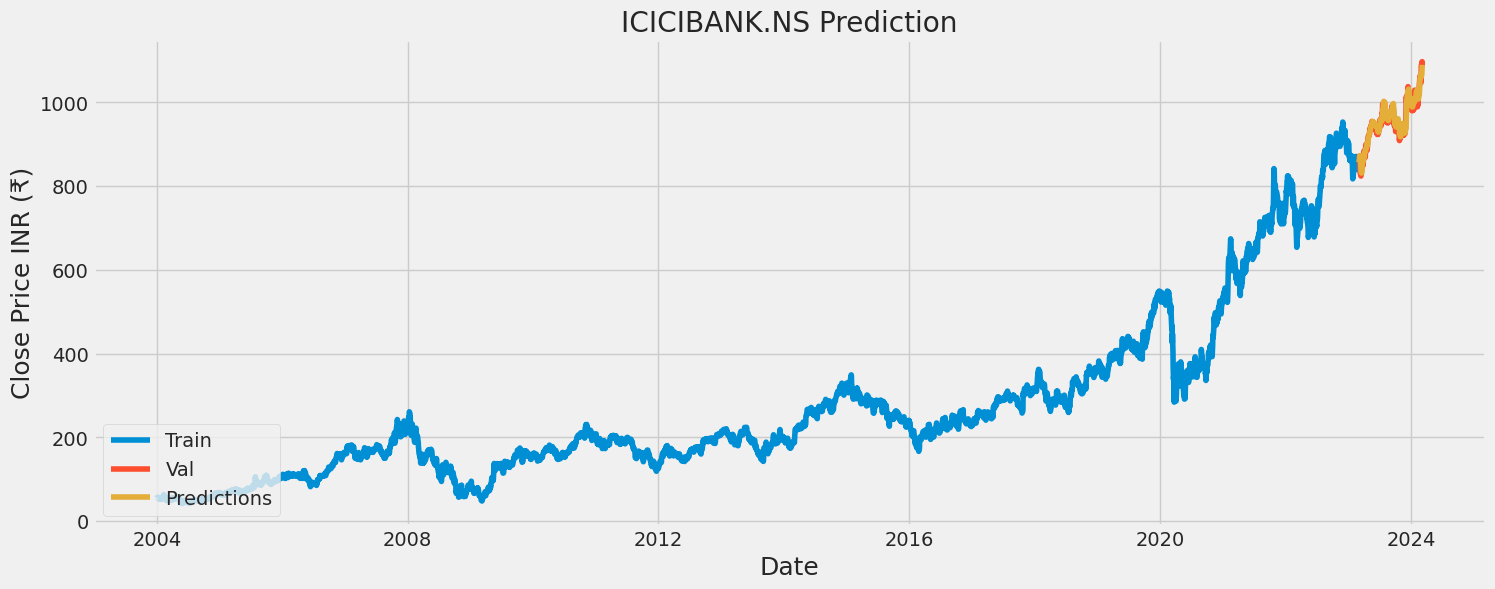

In [111]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('ICICIBANK.NS Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-06-22,430.149994,412.117401
2020-06-23,443.649994,424.640686
2020-06-24,424.649994,438.289032
2020-06-25,421.700012,441.151794
2020-06-26,424.850006,438.567596
...,...,...
2020-12-23,592.450012,609.661377
2020-12-24,610.200012,608.376953
2020-12-28,617.650024,615.016296
